In [453]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import audioflux as af
from scipy.io import wavfile
import sounddevice as sd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [454]:
savee = os.listdir('savee_dataset')
crema_d = os.listdir('crema_d_dataset')
ravdess = os.listdir('ravdess_dataset')
tess = os.listdir('TESS')

In [455]:
emotion = []
for wav in savee:
    w = wav.split('_')[1]
    if w[0:2] == 'sa':
        emotion.append('male_sad')
    elif w[0] == 'n':
        emotion.append('male_neutral')
    elif w[0:2] == 'su':
        emotion.append('male_surprised')
    elif w[0] == 'f':
        emotion.append('male_fear')
    elif w[0] == 'd':
        emotion.append('male_disgust')
    elif w[0] == 'h':
        emotion.append('male_happy')
    elif w[0] =='a':
        emotion.append('male_anger')
print(len(emotion))

480


In [456]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(savee, columns=['Path'])
savee_df = pd.concat([emotion_df, path_df], axis = 1)
savee_df['folder'] = 'savee_dataset/'
savee_df.head(10)

,Emotions,Path,folder
0,male_sad,JK_sa01.wav,savee_dataset/
1,male_sad,JK_sa15.wav,savee_dataset/
2,male_neutral,DC_n13.wav,savee_dataset/
3,male_surprised,DC_su09.wav,savee_dataset/
4,male_neutral,DC_n07.wav,savee_dataset/
5,male_neutral,JK_n20.wav,savee_dataset/
6,male_neutral,JK_n08.wav,savee_dataset/
7,male_sad,JE_sa08.wav,savee_dataset/
8,male_fear,JK_f15.wav,savee_dataset/
9,male_fear,JK_f01.wav,savee_dataset/


In [457]:
tess.remove('.DS_Store')

In [458]:
emotion=[]
tess_wavs=[]
for folder in tess:
    fname=os.listdir('TESS/' + folder)
    for files in fname:
        tess_wavs.append(f'{folder}/{files}')
        if folder == 'OAF_Sad' or folder == 'YAF_sad':
            emotion.append('female_sad')
        elif folder == 'OAF_neutral' or folder == 'YAF_neutral':
            emotion.append('female_neutral')
        elif folder == 'OAF_Pleasant_surprise' or folder == 'YAF_pleasant_surprised':
            emotion.append('female_surprised')
        elif folder == 'OAF_Fear' or folder == 'YAF_fear':
            emotion.append('female_fear')
        elif folder == 'OAF_disgust' or folder == 'YAF_disgust':
            emotion.append('female_disgust')
        elif folder == 'OAF_happy' or folder == 'YAF_happy':
            emotion.append('female_happy')
        elif folder =='OAF_angry' or folder == 'YAF_angry':
            emotion.append('female_anger')

In [459]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(tess_wavs, columns=['Path'])
tess_df = pd.concat([emotion_df, path_df], axis = 1)
tess_df['folder'] = 'TESS/'

In [460]:
'''from sklearn.utils import shuffle

tess_df = shuffle(tess_df).reset_index(drop=True)
tess_df= tess_df.loc[0:700,:]
tess_df.shape'''

'from sklearn.utils import shuffle\n\ntess_df = shuffle(tess_df).reset_index(drop=True)\ntess_df= tess_df.loc[0:700,:]\ntess_df.shape'

In [461]:
tess_df['Emotions'].value_counts()

Emotions
female_disgust      400
female_surprised    400
female_happy        400
female_sad          400
female_neutral      400
female_fear         400
female_anger        400
Name: count, dtype: int64

In [462]:
samples=[]
for i in crema_d:
    samples.append(i[5:8])

samples = set(samples)
print(len(samples))

12


In [463]:
emotion = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,
          1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,
          1084,1089,1091]
for wav in crema_d:
    w = wav.split('_')
    if int(w[0]) in female:
        if w[2] == 'SAD':
            emotion.append('female_sad')
        elif w[2] == 'NEU':
            emotion.append('female_neutral')
        elif w[2] == 'SUR':
            emotion.append('female_surprised')
        elif w[2] == 'FEA':
            emotion.append('female_fear')
        elif w[2] == 'DIS':
            emotion.append('female_disgust')
        elif w[2] == 'HAP':
            emotion.append('female_happy')
        elif w[2] =='ANG':
            emotion.append('female_anger')
    else:
        if w[2] == 'SAD':
            emotion.append('male_sad')
        elif w[2] == 'NEU':
            emotion.append('male_neutral')
        elif w[2] == 'SUR':
            emotion.append('male_surprised')
        elif w[2] == 'FEA':
            emotion.append('male_fear')
        elif w[2] == 'DIS':
            emotion.append('male_disgust')
        elif w[2] == 'HAP':
            emotion.append('male_happy')
        elif w[2] =='ANG':
            emotion.append('male_anger')
print(len(emotion))

7442


In [464]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(crema_d, columns=['Path'])
crema_d_df = pd.concat([emotion_df, path_df], axis = 1)
crema_d_df['folder'] = 'crema_d_dataset/'

In [465]:
crema_d_df['Emotions'].value_counts()

Emotions
male_anger        671
male_disgust      671
male_sad          671
male_happy        671
male_fear         671
female_anger      600
female_disgust    600
female_sad        600
female_fear       600
female_happy      600
male_neutral      575
female_neutral    512
Name: count, dtype: int64

In [466]:
ravdess.remove('.DS_Store')

In [467]:
emotion = []
ravdess_wavs = []
for actor in ravdess:
    wavs = os.listdir(f'ravdess_dataset/{actor}')
    for wav in wavs:
        ravdess_wavs.append(f'{actor}/{wav}')
        if int(wav[18:20])%2==0:
            if wav[7:8] == '4':
                emotion.append('female_sad')
            elif wav[7:8] == '1':
                emotion.append('female_neutral')
            elif wav[7:8] == '8':
                emotion.append('female_surprised')
            elif wav[7:8] == '6':
                emotion.append('female_fear')
            elif wav[7:8] == '7':
                emotion.append('female_disgust')
            elif wav[7:8] == '3':
                emotion.append('female_happy')
            elif wav[7:8] =='5':
                emotion.append('female_anger')
            elif wav[7:8] =='2':
                emotion.append('female_neutral')
        else:
            if wav[7:8] == '4':
                emotion.append('male_sad')
            elif wav[7:8] == '1':
                emotion.append('male_neutral')
            elif wav[7:8] == '8':
                emotion.append('male_surprised')
            elif wav[7:8] == '6':
                emotion.append('male_fear')
            elif wav[7:8] == '7':
                emotion.append('male_disgust')
            elif wav[7:8] == '3':
                emotion.append('male_happy')
            elif wav[7:8] =='5':
                emotion.append('male_anger')
            elif wav[7:8] =='2':
                emotion.append('male_neutral')
        
print(len(emotion))

1440


In [468]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(ravdess_wavs, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis = 1)
ravdess_df['folder'] = 'ravdess_dataset/'

In [469]:
ravdess_df = ravdess_df[ravdess_df['Emotions'] != 'disgust']
#ravdess_df = ravdess_df[ravdess_df['Emotions'] != 'surprised']
ravdess_df = ravdess_df.reset_index(drop=True)

In [470]:
#data = pd.concat([savee_df, tess_df, ravdess_df, crema_d_df], axis=0)
data = pd.concat([savee_df, tess_df, ravdess_df], axis=0)
#data=ravdess_df
data = data.reset_index(drop=True)

In [471]:
data.head()

,Emotions,Path,folder
0,male_sad,JK_sa01.wav,savee_dataset/
1,male_sad,JK_sa15.wav,savee_dataset/
2,male_neutral,DC_n13.wav,savee_dataset/
3,male_surprised,DC_su09.wav,savee_dataset/
4,male_neutral,DC_n07.wav,savee_dataset/


In [472]:
data['Emotions'].value_counts()

Emotions
female_neutral      544
female_disgust      496
female_surprised    496
female_happy        496
female_sad          496
female_fear         496
female_anger        496
male_neutral        264
male_sad            156
male_surprised      156
male_fear           156
male_disgust        156
male_happy          156
male_anger          156
Name: count, dtype: int64

In [473]:
data = data[data['Emotions'] != 'female_disgust']
data = data[data['Emotions'] != 'male_disgust']
data = data[data['Emotions'] != 'female_surprised']
data = data[data['Emotions'] != 'male_surprised']
data = data.reset_index(drop=True)

In [474]:
from sklearn.utils import shuffle

data = shuffle(data).reset_index(drop=True)

In [475]:
data[0:10]

,Emotions,Path,folder
0,male_neutral,Actor_01/03-01-01-01-02-01-01.wav,ravdess_dataset/
1,female_fear,OAF_Fear/OAF_food_fear.wav,TESS/
2,male_neutral,JE_n27.wav,savee_dataset/
3,female_happy,OAF_happy/OAF_chalk_happy.wav,TESS/
4,female_neutral,OAF_neutral/OAF_sell_neutral.wav,TESS/
5,female_anger,Actor_04/03-01-05-01-01-01-04.wav,ravdess_dataset/
6,female_fear,OAF_Fear/OAF_rain_fear.wav,TESS/
7,female_anger,YAF_angry/YAF_book_angry.wav,TESS/
8,female_neutral,Actor_02/03-01-01-01-01-01-02.wav,ravdess_dataset/
9,male_neutral,DC_n06.wav,savee_dataset/


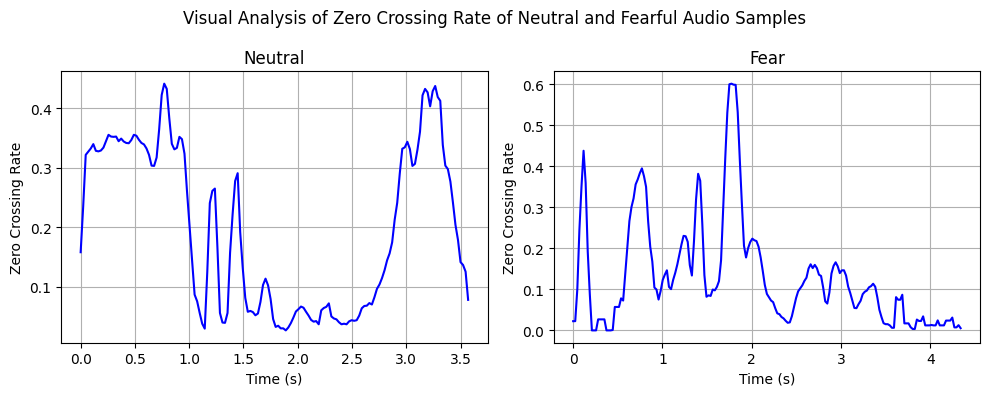

In [476]:
#ANGER
neutral,n_sr=librosa.load('ravdess_dataset/Actor_10/03-01-02-01-01-01-10.wav')
fear,f_sr=librosa.load('ravdess_dataset/Actor_07/03-01-05-02-02-02-07.wav')

n_zcr=librosa.feature.zero_crossing_rate(neutral)
f_zcr=librosa.feature.zero_crossing_rate(fear)

# Create time axes
n_time_zcr = np.linspace(0, len(neutral)/n_sr, len(n_zcr[0]))
f_time_zcr = np.linspace(0, len(fear)/f_sr, len(f_zcr[0]))
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot neutral
ax[0].plot(n_time_zcr, n_zcr[0], color='b')
ax[0].set_title('Neutral')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Zero Crossing Rate')
ax[0].grid(True)

# Plot fear
ax[1].plot(f_time_zcr, f_zcr[0], color='b')
ax[1].set_title('Fear')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Zero Crossing Rate')
ax[1].grid(True)


plt.suptitle('Visual Analysis of Zero Crossing Rate of Neutral and Fearful Audio Samples')
plt.tight_layout()
plt.show()

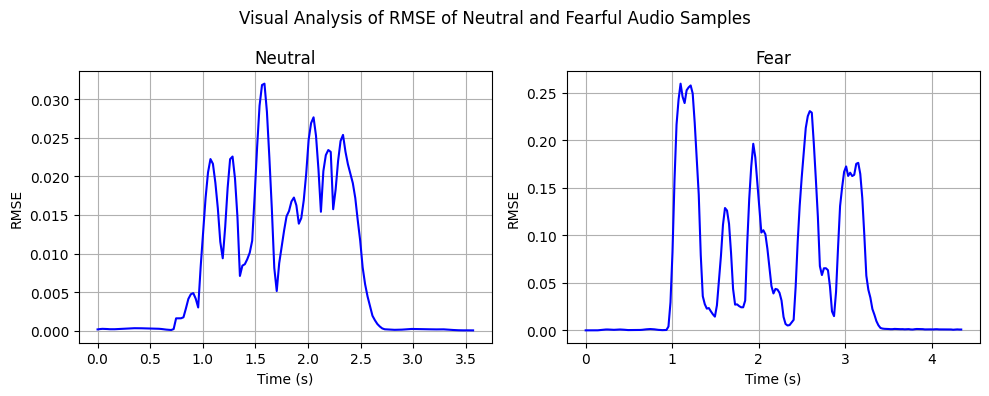

In [477]:
neutral,n_sr=librosa.load('ravdess_dataset/Actor_10/03-01-02-01-01-01-10.wav')
fear,f_sr=librosa.load('ravdess_dataset/Actor_07/03-01-05-02-02-02-07.wav')

n_rmse=librosa.feature.rms(y=neutral)
f_rmse=librosa.feature.rms(y=fear)


# Create time axes
n_time_rmse = np.linspace(0, len(neutral)/n_sr, len(n_rmse[0]))
f_time_rmse = np.linspace(0, len(fear)/f_sr, len(f_rmse[0]))
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot neutral
ax[0].plot(n_time_rmse, n_rmse[0], color='b')
ax[0].set_title('Neutral')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)

# Plot fear
ax[1].plot(f_time_rmse, f_rmse[0], color='b')
ax[1].set_title('Fear')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('RMSE')
ax[1].grid(True)


plt.suptitle('Visual Analysis of RMSE of Neutral and Fearful Audio Samples')
plt.tight_layout()
plt.show()

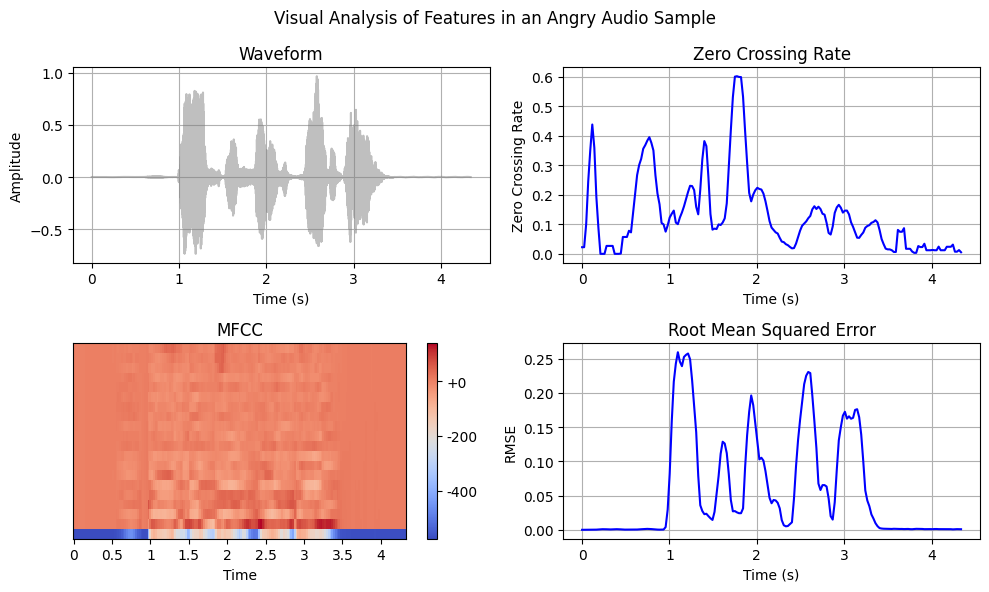

In [478]:
#ANGER
data1,sr=librosa.load('ravdess_dataset/Actor_07/03-01-05-02-02-02-07.wav')
zcr=librosa.feature.zero_crossing_rate(data1)
rmse=librosa.feature.rms(y=data1)
mfcc = librosa.feature.mfcc(y=data1)

# Create time axes
time_zcr = np.linspace(0, len(data1)/sr, len(zcr[0]))
time_wave = np.linspace(0, len(data1)/sr, len(data1))
time_rms = np.linspace(0, len(data1)/sr, len(rmse[0]))


# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# Plot waveform
ax[0,0].plot(time_wave, data1, color='gray', alpha=0.5)
ax[0,0].set_title('Waveform')
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_ylabel('Amplitude')
ax[0,0].grid(True)

# Plot ZCR
ax[0,1].plot(time_zcr, zcr[0], color='b')
ax[0,1].set_title('Zero Crossing Rate')
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_ylabel('Zero Crossing Rate')
ax[0,1].grid(True)

img = librosa.display.specshow(mfcc, x_axis='time',ax=ax[1,0],cmap='coolwarm')
ax[1,0].set_title('MFCC')
plt.colorbar(img, ax=ax[1,0], format='%+2.f')

# Plot RMSE
ax[1,1].plot(time_rms, rmse[0], color='b')
ax[1,1].set_title('Root Mean Squared Error')
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_ylabel('RMSE')
ax[1,1].grid(True)

plt.suptitle('Visual Analysis of Features in an Angry Audio Sample')
plt.tight_layout()
plt.show()

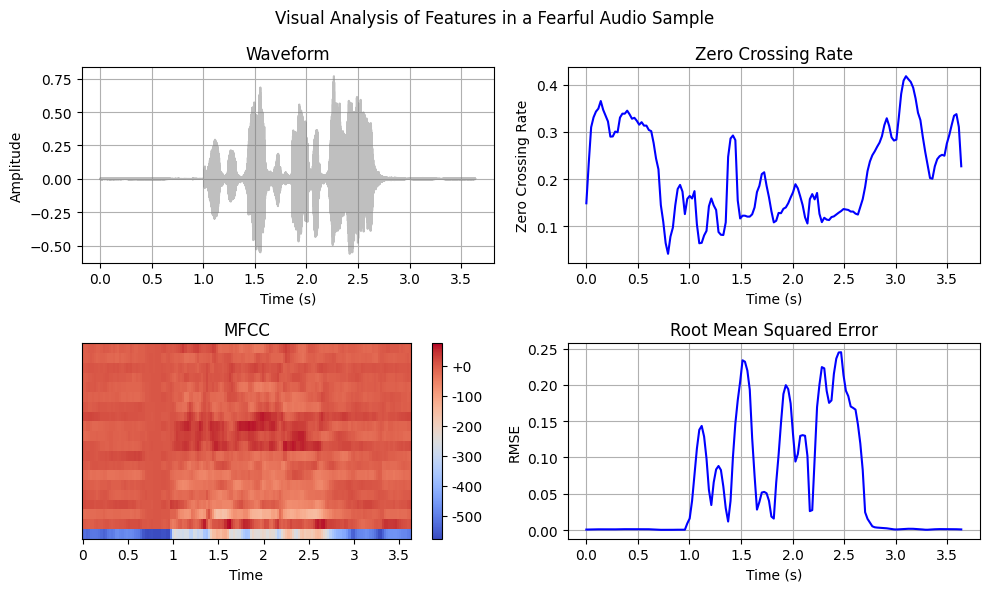

In [479]:
#Neutral
data1,sr=librosa.load('ravdess_dataset/Actor_06/03-01-06-02-01-01-06.wav')
zcr=librosa.feature.zero_crossing_rate(data1)
rmse=librosa.feature.rms(y=data1)
mfcc = librosa.feature.mfcc(y=data1)

# Create time axes
time_zcr = np.linspace(0, len(data1)/sr, len(zcr[0]))
time_wave = np.linspace(0, len(data1)/sr, len(data1))
time_rms = np.linspace(0, len(data1)/sr, len(rmse[0]))


# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# Plot waveform
ax[0,0].plot(time_wave, data1, color='gray', alpha=0.5)
ax[0,0].set_title('Waveform')
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_ylabel('Amplitude')
ax[0,0].grid(True)

# Plot ZCR
ax[0,1].plot(time_zcr, zcr[0], color='b')
ax[0,1].set_title('Zero Crossing Rate')
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_ylabel('Zero Crossing Rate')
ax[0,1].grid(True)

img = librosa.display.specshow(mfcc, x_axis='time',ax=ax[1,0],cmap='coolwarm')
ax[1,0].set_title('MFCC')
plt.colorbar(img, ax=ax[1,0], format='%+2.f')

# Plot RMSE
ax[1,1].plot(time_rms, rmse[0], color='b')
ax[1,1].set_title('Root Mean Squared Error')
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_ylabel('RMSE')
ax[1,1].grid(True)

plt.suptitle('Visual Analysis of Features in a Fearful Audio Sample')
plt.tight_layout()
plt.show()

In [480]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=22050, n_steps=0.7)

In [481]:
def zcr(data):
    zcr=librosa.feature.zero_crossing_rate(data)
    return np.squeeze(zcr)

def rmse(data):
    rmse=librosa.feature.rms(y=data)
    return np.squeeze(rmse)

def mfcc(data, flatten:bool=True):
    mfcc = librosa.feature.mfcc(y=data)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def mel(data, flatten:bool=True):
    mel = librosa.feature.melspectrogram(y=data)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def extract_features(data):
    result=np.array([])
    result=np.hstack((result, zcr(data), rmse(data), mfcc(data)))
    return result

def get_features(path):
    data,sr=librosa.load(path)    
    aud = extract_features(data)
    audio = np.array(aud)

    noise_audio=noise(data)
    naud = extract_features(noise_audio)
    audio=np.vstack((audio,naud))

    pitched_audio=pitch(data)
    paud = extract_features(pitched_audio)
    audio=np.vstack((audio,paud))

    pna=noise(pitched_audio)
    pnaud=extract_features(pna)
    audio=np.vstack((audio, pnaud))
    
    return audio

In [482]:
X=[]
Y=[]
for path,folder,emotion in (zip(data.Path,data.folder,data.Emotions)):
    path = folder+path
    features=get_features(path)
    for feature in features:
        X.append(feature)
        Y.append(emotion)

In [483]:
Emotions = pd.DataFrame(X)
Emotions['Emotions']=Y
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,6767,6768,6769,6770,6771,6772,6773,6774,6775,Emotions
0,0.200684,0.311523,0.479004,0.473145,0.530762,0.528809,0.476562,0.575195,0.595703,0.708984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
1,0.243164,0.374023,0.506348,0.514160,0.509277,0.498535,0.501953,0.512695,0.512207,0.515137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
2,0.111328,0.134766,0.169922,0.174316,0.176758,0.197754,0.199707,0.192871,0.238281,0.268555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
3,0.126953,0.164062,0.227539,0.233887,0.243164,0.259766,0.245117,0.255859,0.306641,0.350586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_neutral
4,0.009277,0.066406,0.175293,0.303711,0.425293,0.513184,0.535156,0.426270,0.304199,0.174316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_fear


In [484]:
Emotions.shape

(13664, 6777)

In [485]:
Emotions['Emotions'].value_counts()

Emotions
female_neutral    2176
female_fear       1984
female_happy      1984
female_anger      1984
female_sad        1984
male_neutral      1056
male_anger         624
male_happy         624
male_fear          624
male_sad           624
Name: count, dtype: int64

In [486]:
Emotions.isna().sum()

0               0
1               0
2               0
3               0
4               0
            ...  
6772        13660
6773        13660
6774        13660
6775        13660
Emotions        0
Length: 6777, dtype: int64

In [487]:
Emotions= Emotions.fillna(0)

In [488]:
X=Emotions.iloc[:,:-1].values
Y=Emotions['Emotions'].values

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [490]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_val=label_encoder.transform(y_val)
y_test=label_encoder.transform(y_test)
print(y_train)

[4 5 0 ... 1 3 5]


In [491]:
'''from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_reshaped)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler, MinMaxScaler\n\nscaler = StandardScaler()\nscaler.fit(X_reshaped)\nX_train = scaler.transform(X_train)\nX_val = scaler.transform(X_val)\nX_test = scaler.transform(X_test)'

In [492]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(8198, 6776)
(2733, 6776)
(2733, 6776)


In [493]:
X_train

array([[0.        , 0.00146484, 0.05615234, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19580078, 0.29003906, 0.37207031, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09423828, 0.21972656, 0.36328125, ..., 0.        , 0.        ,
        0.        ],
       [0.37646484, 0.61083984, 0.81787109, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [279]:
'''import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
X_reshaped = pca.fit_transform(X_reshaped)
X_val_reshaped = pca.transform(X_val_reshaped)
X_test_reshaped = pca.transform(X_test_reshaped)'''


'import numpy as np\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components = 40)\nX_reshaped = pca.fit_transform(X_reshaped)\nX_val_reshaped = pca.transform(X_val_reshaped)\nX_test_reshaped = pca.transform(X_test_reshaped)'

0.66

In [381]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [382]:
k_list = []
scores_list = [] 
 
for k in range(1,10):
        knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean")
        knn.fit(X_train,y_train)
        y_pred=knn.predict(np.array(X_test)) 
        k_list.append(k)
        accuracy = metrics.accuracy_score(y_test,y_pred)
        print(k, 'accuracy',accuracy)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

1 accuracy 0.7371134020618557
2 accuracy 0.7371134020618557
3 accuracy 0.6900773195876289
4 accuracy 0.654639175257732
5 accuracy 0.6327319587628866
6 accuracy 0.6179123711340206
7 accuracy 0.6024484536082474
8 accuracy 0.5856958762886598
9 accuracy 0.5773195876288659


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [494]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [495]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_valcnn= np.expand_dims(X_val, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
x_traincnn.shape, y_train.shape, x_valcnn.shape, y_val.shape, x_testcnn.shape, y_test.shape

((8198, 6776, 1), (8198,), (2733, 6776, 1), (2733,), (2733, 6776, 1), (2733,))

In [496]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(16,kernel_size=5,strides=1,padding='same',activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2),  
    
    L.Conv1D(32,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2),  
    
    L.Conv1D(64,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2), 

    L.Flatten(),
    L.Dense(32,activation='relu'),
    L.BatchNormalization(),
    L.Dense(10,activation='softmax')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_70 (Conv1D)              │ (None, 6776, 16)       │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 6776, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_70 (MaxPooling1D) │ (None, 3388, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 3388, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_71 (Conv1D)              │ (None, 3388, 32)       │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 3388, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_71 (MaxPooling1D) │ (None, 1694, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 1694, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_72 (Conv1D)              │ (None, 1694, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 1694, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_72 (MaxPooling1D) │ (None, 847, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 847, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 54208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │     1,734,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,743,466 (6.65 MB)

 Trainable params: 1,743,178 (6.65 MB)

 Non-trainable params: 288 (1.12 KB)

In [497]:
%load_ext tensorboard

import datetime
import tensorflow as tf
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_traincnn,y_train,
                   epochs=25,
                   validation_data=(x_valcnn,y_val),
                   callbacks=cp)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.4776 - loss: 1.5981 - val_accuracy: 0.3816 - val_loss: 1.5656
Epoch 2/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - accuracy: 0.7644 - loss: 0.6996 - val_accuracy: 0.6407 - val_loss: 0.8961
Epoch 3/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.8341 - loss: 0.5067 - val_accuracy: 0.7911 - val_loss: 0.6023
Epoch 4/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.8653 - loss: 0.3918 - val_accuracy: 0.8474 - val_loss: 0.5316
Epoch 5/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.9008 - loss: 0.3129 - val_accuracy: 0.8489 - val_loss: 0.4277
Epoch 6/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.9238 - loss: 0.2386 - val_accuracy: 0.8547 - val_loss: 0.4264
Epoch 7/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9458 - loss: 0.1804 - val_accuracy: 0.8383 - val_loss: 0.5429


In [498]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 20630), started 0:32:29 ago. (Use '!kill 20630' to kill it.)

In [499]:
model.evaluate(x_testcnn,y_test)

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9325 - loss: 0.2187


[0.21272099018096924, 0.938163161277771]

In [500]:
predicted_emotion = model.predict(x_testcnn)

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [501]:
predicted_classes = np.argmax(predicted_emotion, axis=1)
predicted_classes[0:20]

array([2, 0, 3, 5, 5, 0, 8, 2, 0, 9, 9, 3, 1, 0, 4, 9, 0, 1, 4, 1])

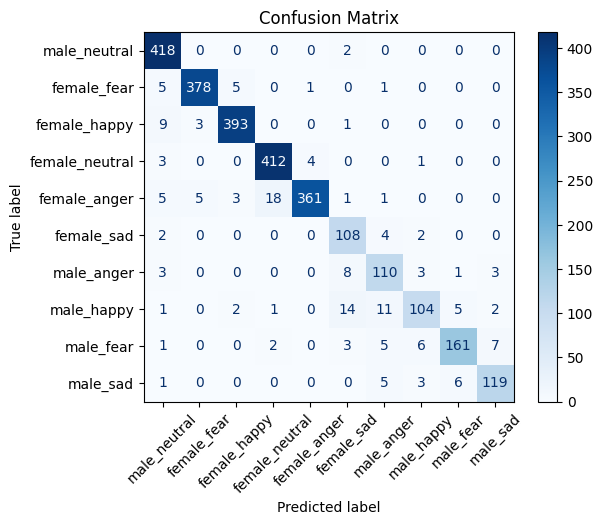

In [502]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = data['Emotions'].unique()
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [380]:
from sklearn import svm

model=svm.SVC()
model.fit(X_reshaped,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2534, 4653]

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_reshaped)
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))